### Question 3   
Begin the analysis of one variable in the dataset you are using the final project.  As this is an individual homework assignment, each group member should choose a different variable.   
Choose three visualizations as appropriate to show the distribution of the variable, conditioned on another variable if desired (for example, the distribution of income by region).     
Write a few sentences describing what you found and what new questions your visualizations have generated. (Faceted graphs count as one graph; graphs put together with grid.arrange() or similar count as multiple graphs.)

In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('the-office-lines - scripts.csv')

In [21]:
# Let's see our variables 
for i in range(0,len(df.columns.values)):
    print('Variable',i+1,'-',df.columns.values[i])

Variable 1 - id
Variable 2 - season
Variable 3 - episode
Variable 4 - scene
Variable 5 - line_text
Variable 6 - speaker
Variable 7 - deleted


In [20]:
# Let's see the dataframe.
df.head(5)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


#### I will be choosing deleted as the variable.

In [41]:
import numpy as np

# Let's see whose scenes are deleted the most (top 10 speakers)
speakers = np.unique(df['speaker'],return_counts=True)[1]
top = sorted(range(len(speakers)), key=lambda i: speakers[i])[-10:]

top_speakers = np.unique(df['speaker'])[top][::-1]

In [42]:
# So the top speakers are...

top_speakers

array(['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela',
       'Oscar', 'Erin', 'Ryan'], dtype=object)

In [46]:
# Lets take the subset of the dataframe
aux_df = df[df['speaker'].isin(top_speakers)]

In [50]:
aux_df['deleted'] = aux_df['deleted'].astype(int)

C:\Users\ganto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
# Get average of deleted scenes per speaker
del_per_speaker = aux_df[['speaker', 'deleted']].groupby(['speaker'], as_index=False).mean()

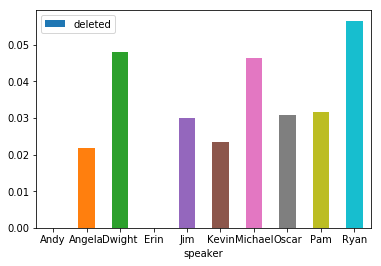

In [110]:
# Let see it as a barplot
ax = del_per_speaker.plot.bar(x='speaker', y='deleted', rot=0, label = None)

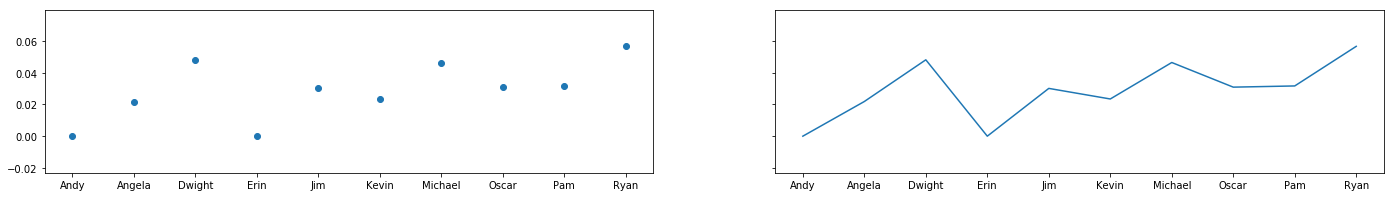

In [155]:
# More plots
import matplotlib.pyplot as plt

data = del_per_episode.to_dict()
names =list(del_per_speaker['speaker'])
values = list(del_per_speaker['deleted'])

fig, axs = plt.subplots(1, 2, figsize=(24, 3), sharey=True)
axs[0].scatter(names, values)
axs[1].plot(names, values)

In [104]:
aux_df[['speaker', 'deleted']].groupby(['speaker'], as_index=False).mean()

,speaker,deleted
0,Andy,0.000000
1,Angela,0.021829
2,Dwight,0.048081
3,Erin,0.000000
4,Jim,0.030085
5,Kevin,0.023419
6,Michael,0.046387
7,Oscar,0.030872
8,Pam,0.031628
9,Ryan,0.056563


In [120]:
# Also, let see how many are deleted on average per season.
del_per_season = aux_df[['season', 'deleted']].groupby(['season'], as_index=False).mean()

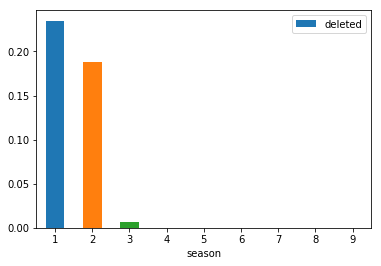

In [121]:
# Let see it as a barplot
ax2 = del_per_season.plot.bar(x='season', y='deleted', rot=0)

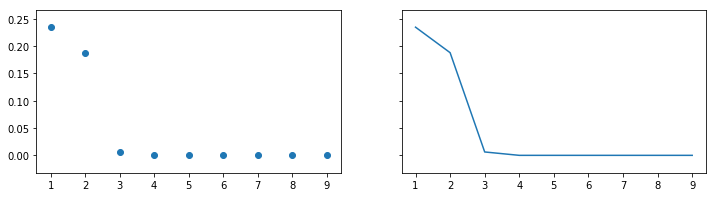

In [156]:
# More plots
import matplotlib.pyplot as plt

data = del_per_episode.to_dict()
names =list(del_per_season['season'])
values = list(del_per_season['deleted'])

fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
axs[0].scatter(names, values)
axs[1].plot(names, values)

In [124]:
# Finally, let's see it per speaker
del_per_episode = aux_df[['episode', 'deleted']].groupby(['episode'], as_index=False).mean()

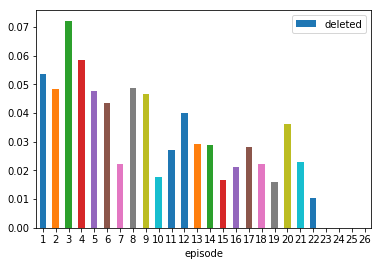

In [126]:
# Let see it as a barplot
ax = del_per_episode.plot.bar(x='episode', y='deleted', rot=0)

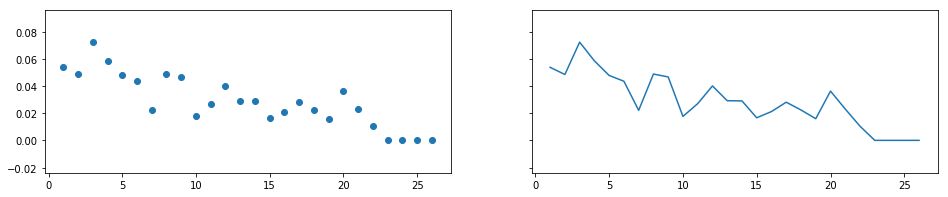

In [157]:
# More plots
import matplotlib.pyplot as plt

data = del_per_episode.to_dict()
names =list(del_per_episode['episode'])
values = list(del_per_episode['deleted'])

fig, axs = plt.subplots(1, 2, figsize=(16, 3), sharey=True)
axs[0].scatter(names, values)
axs[1].plot(names, values)